# Task 4.10
### Part 1

1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.
2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
* 3.1 Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
* 3.2 Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
6. Create an appropriate visualization to show the distribution of profiles.
7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
9. Visualizations specific to project brief



# Task 1. 
## import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## import data import '4.9_part1B.pkl

In [2]:
#set path
path = r"C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 4\Instacart Basket Analysis"

In [3]:
%%time 
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9_part1B.pkl'))

CPU times: total: 21 s
Wall time: 6min 41s


In [4]:
#check
df

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_dspo,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,prior,26,4,23,5.0,19675,1,1,...,High spender,7.0,Frequent customer,Male,Hawaii,25,2017-05-26,0,single,53755
32404855,484769,66343,prior,1,6,11,NaN,47210,1,0,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,2017-09-12,3,married,46151
32404856,1561557,66343,prior,2,1,11,30.0,47210,1,1,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,2017-09-12,3,married,46151
32404857,276317,66343,prior,3,6,15,19.0,47210,1,1,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,2017-09-12,3,married,46151


In [5]:
#distribution check
df.describe()

,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_price,median_dspo,age,n_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,1.198023e+01,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.956554e+02,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


### 2 corrections to df made previously but did not transfer
### change spelling for n_dependants to n_dependents

In [6]:
df.rename(columns = {'n_dependants': 'n_dependents'}, inplace = True)

### eliminate prices above $100

In [7]:
df.loc[df['prices'] >100, 'prices'] = np.nan

# Task 2. 
## First and Last name columns are dropped to maintain PII privacy

In [8]:
#from data wrangling task4.9_part1.pkl 
#df_cust_rename_drop = df_cust.drop(columns = ['first_name', 'surname'])

In [9]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   eval_set                object        
 3   order_number            int64         
 4   orders_day_of_week      int64         
 5   order_hour_of_day       int64         
 6   days_since_prior_order  float64       
 7   product_id              int64         
 8   add_to_cart_order       int64         
 9   reordered               int64         
 10  product_name            object        
 11  aisle_id                int64         
 12  department_id           int64         
 13  prices                  float64       
 14  price_range_loc         object        
 15  busiest_day             object        
 16  busiest_days            object        
 17  busiest_period_of_day   object        
 18  

# Task 3.
## A regional segmentation of customers
## B spending analysis by region

In [10]:
#check the state column
df['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

## 3A regional segmentation

In [11]:
#create new region variable 
region = []

In [12]:
#for loop to fill region variable according to directions
for value in df['state']:
    if value in ['Maine','New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [13]:
#insert region as column into df
df['region'] = region


In [14]:
#check region column 
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

## 3B analyze regional spending habits
### using spending flag, count customer type for each region
### spending_flag variable defines user_id as high/low based on average price of products purchased (</> $10)

In [15]:
# spending_flag variable defines user_id as high/low based on average price of products purchased (</> $10)

In [16]:
#create crosstab with data for plotting
crosstab_3 = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [17]:
#check
crosstab_3

spending_flag,High spender,Low spender
region,,
Midwest,155968,7441357
Northeast,108200,5614536
South,209691,10582194
West,160354,8132559


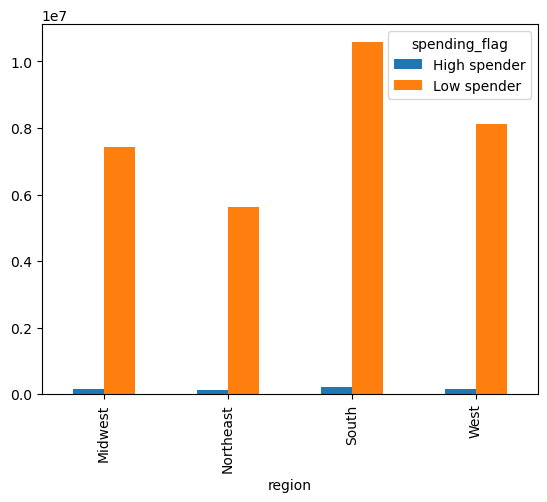

In [18]:
#print bar chart
bar_region_spending = crosstab_3.plot.bar()

In [19]:
#export 
bar_region_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_region_spending.png' ))

### 3.2 conclusion
### Southern region contains largest volume of customers for both spending categories.
### Additionally, proportion of high:low spending customers is roughly the same throughout the regions. 

In [20]:
#check rows and consistancy
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   eval_set                object        
 3   order_number            int64         
 4   orders_day_of_week      int64         
 5   order_hour_of_day       int64         
 6   days_since_prior_order  float64       
 7   product_id              int64         
 8   add_to_cart_order       int64         
 9   reordered               int64         
 10  product_name            object        
 11  aisle_id                int64         
 12  department_id           int64         
 13  prices                  float64       
 14  price_range_loc         object        
 15  busiest_day             object        
 16  busiest_days            object        
 17  busiest_period_of_day   object        
 18  

# Task 4. 
## Exclude low revenue customers 
### create and export dataframe with customers who have 5 or greater orders

In [9]:
#create exclusion flag 
df.loc[df['max_order'] < 5, 'order_activity_flag'] = 'Low order activity customer'
df.loc[df['max_order'] >= 5, 'order_activity_flag'] = 'High order activity customer'

In [10]:
#create subset for high value customers
df_high_order_activity = df[df['order_activity_flag'] == 'High order activity customer']

In [11]:
df['order_activity_flag'].value_counts()

High order activity customer    30964564
Low order activity customer      1440295
Name: order_activity_flag, dtype: int64

In [23]:
#export dataframe
df_high_order_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','4.10.4_high_order_activity.pkl'))

# Task 5. 
## Create data driven customer profiles based on age, income, dependents, and department_id preferences.
### A. identify criteria by exploring correlations and each variable
### B. segment user_id's based on the unique characteristics identified


## 5A. explore correlation between variables
### 5A1. income vs age

CPU times: total: 6.42 s
Wall time: 6.87 s


<Axes: xlabel='age', ylabel='income'>

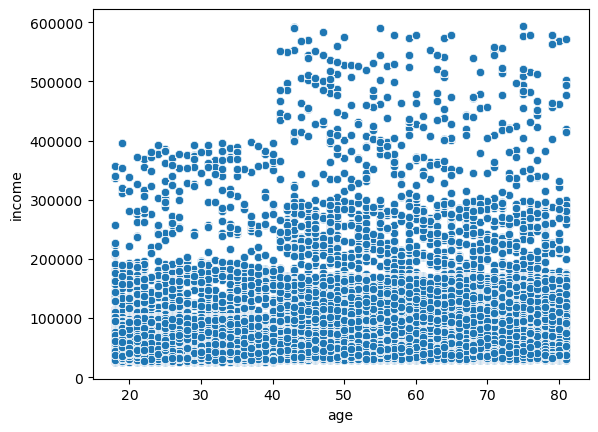

In [24]:
%%time
sns.scatterplot(x = 'age', y = 'income',data = df)

### criteria segment under 40 and above 40 for high and low income

### 5A2. n_dependents vs age

CPU times: total: 6.08 s
Wall time: 6.18 s


<Axes: xlabel='age', ylabel='n_dependents'>

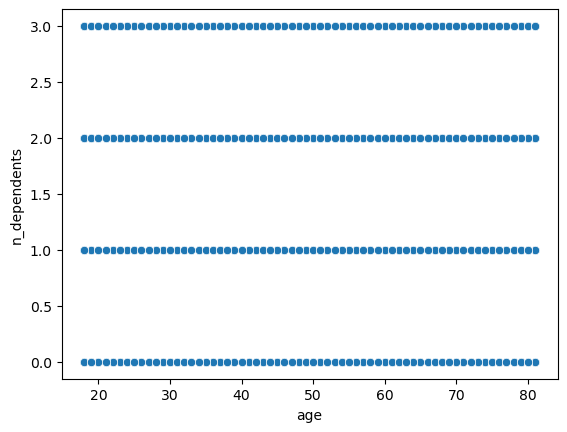

In [25]:
%%time
sns.scatterplot(x = 'age', y = 'n_dependents',data = df)

### unexpectedly, no correlation is shown between age and dependents. even more unexpected is the spread appears evenly distributed across all ages 

### 5A3. income vs n_dependents

<Axes: xlabel='n_dependents', ylabel='income'>

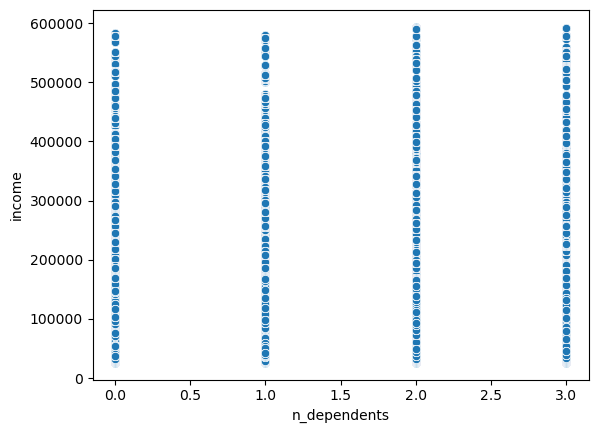

In [26]:
#%%time
sns.scatterplot(x = 'n_dependents', y = 'income',data = df)

### correlation is unclear: income distribution spread is not defined across dependents in this plot

### 5A4. create sample subset to view in line chart

In [27]:
#create list to split dataframe into sample
np.random.seed(5)
dev = np.random.rand(len(df)) <= 0.7

In [28]:
#assign list to create 30% and 70% samples of complete dataframe 
big = df[dev]
small = df[~dev]

In [29]:
#check 
len(big) + len(small)

32404859

In [30]:
#select variables from 30% sample
df_5 = small[['income', 'n_dependents']]

#create chart with sample 

CPU times: total: 3min 17s
Wall time: 3min 20s


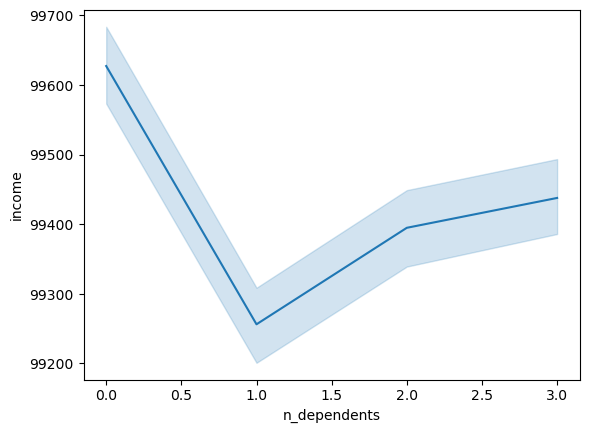

In [31]:
%%time
line_5 = sns.lineplot(data = df_5, x = 'n_dependents',y = 'income')

### results are unclear: the range of income shown in line chart is not expected and does not reflect the dataset. 

## 5A continue exploring data for each variable 
### 5A5. age

<Axes: ylabel='Frequency'>

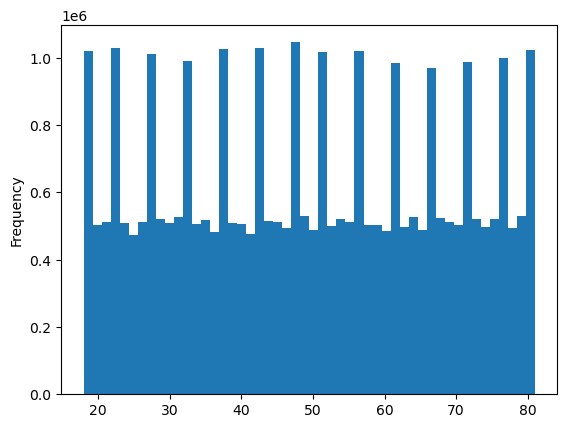

In [32]:
#check distribution 
df['age'].plot.hist(bins = 50)

<Axes: ylabel='Frequency'>

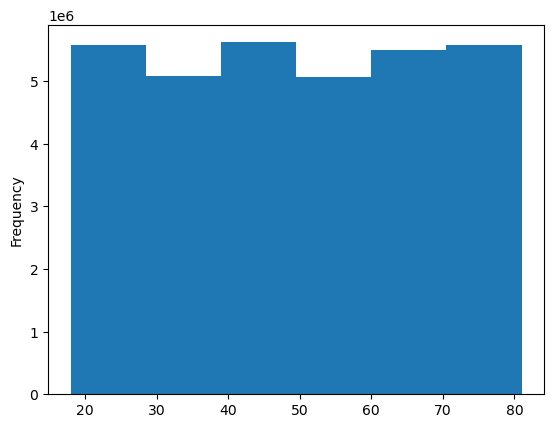

In [33]:
#check distribution 
df['age'].plot.hist(bins = 6)

### customer ages are distributed fairly evenly, which corresponds to mean, median, and std
### criteria for segmenting age can be approx 10 year age groups 

### 5A6. income

<Axes: ylabel='Frequency'>

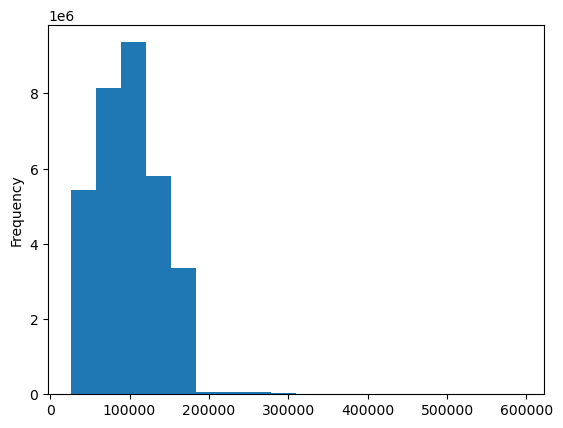

In [34]:
#check distribution,
df['income'].plot.hist(bins = 18)

### income shows normal distribution
### criteria for category will be Q1, Q2, Q3, Q4 = lower, lower-middle, upper-middle, upper incomes

### 5A7. dependents

CPU times: total: 1.09 s
Wall time: 1.11 s


<Axes: ylabel='Frequency'>

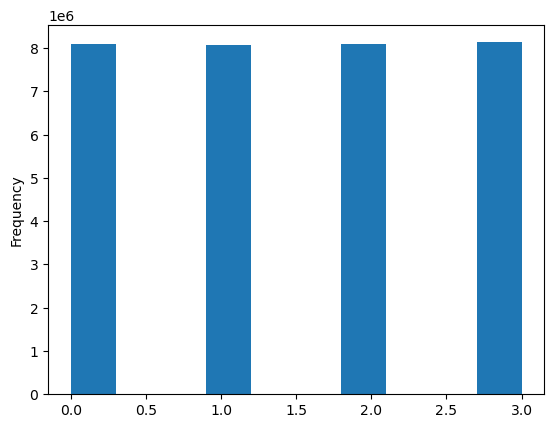

In [35]:
%%time
df['n_dependents'].plot.hist(bins = 10)

In [36]:
df['n_dependents'].value_counts()

3    8135109
0    8097503
2    8091143
1    8081104
Name: n_dependents, dtype: int64

### even though the variable isnt continuous, the histogram shows even distribution of customers across the range 0-3 dependants. 
### criteria for category will be 0 dependents = independent, 1 or more dependents = caregiver

### 5A8. department_id

In [37]:
%%time
df['department_id'].value_counts()

CPU times: total: 203 ms
Wall time: 204 ms


4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

CPU times: total: 1.12 s
Wall time: 1.47 s


<Axes: ylabel='Frequency'>

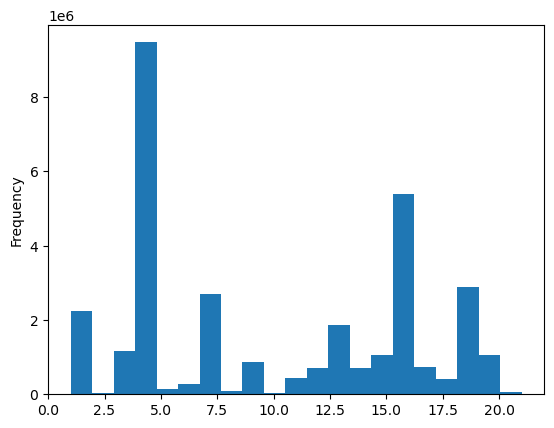

In [8]:
%%time
df['department_id'].plot.hist(bins = 21)

### produce (number 4) is the highest volume department, followed by the dairy/eggs department
### its known from earlier explorations that meat/seafood department contains the most expensive items
### criteria to segment customers will be meat consumer true or false, thereby additionally profiling non-meat consumers and likely higher produce consumers. 

## 5B. develop customer profiles based on criteria for each variable
### 5B1. age: divide into approx 10 year age groups 

In [38]:
age_group = []

for value in df['age']:
    if value < 30:
        age_group.append('Less than 30')
    elif value >= 30 and value < 40:
        age_group.append('30-39 years')
    elif value >= 40 and value < 50:
        age_group.append('40-49 years')
    elif value >= 50 and value < 60:
        age_group.append('50-59 years')
    elif value >= 60 and value < 70:
        age_group.append('60-69 years')
    else: 
        age_group.append('70+ years')

In [39]:
#create and set column in df
df['age_group'] = age_group


In [5]:
#check 
df['age_group'].value_counts()

Less than 30    6090441
70+ years       6079991
40-49 years     5109237
30-39 years     5073751
50-59 years     5064175
60-69 years     4987264
Name: age_group, dtype: int64

### 5B2. income: seperated by quartile 

In [41]:
wealth = []

for value in df['income']:
    if value <= 6.677000e+04:
        wealth.append('lower')
    elif value > 6.677000e+04 and value <= 9.630400e+04:
        wealth.append('lower-middle')
    elif value > 9.630400e+04 and value <= 1.267640e+05:
        wealth.append('upper-middle')
    else:
        wealth.append('upper')
        

In [42]:
#create and set column in df
df['wealth_status'] = wealth

In [6]:
#check
df['wealth_status'].value_counts()

upper           8312697
lower-middle    8030833
lower           8030749
upper-middle    8030580
Name: wealth_status, dtype: int64

### 5B3. n_dependents: segmented into independent and caregiver

In [44]:
df.loc[df['n_dependents'] == 0, 'lifestyle'] = 'independent'

In [45]:
df.loc[df['n_dependents'] != 0, 'lifestyle'] = 'caregiver'

In [46]:
df['lifestyle'].value_counts()

caregiver      24307356
independent     8097503
Name: lifestyle, dtype: int64

### 5B4. department_id: create subsets for meat and non-meat purchasing households

#### step 1

In [7]:
#create exclusion flag column, assign meat consumer to any purchase from meat/seafood department
df.loc[df['department_id'] == 12, 'meat_purchase'] = 'meat_consumer'

In [8]:
# assign meatless to all others 
df.loc[df['department_id'] != 12, 'meat_purchase'] = 'meatless_consumer'

In [9]:
# identify all unique user id's from meat_consumer
inconsistent_values = df.loc[df['meat_purchase'] == 'meat_consumer', 'user_id'].unique()

In [10]:
# update meat_purchase column for consistency
df.loc[df['user_id'].isin(inconsistent_values), 'meat_purchase'] = 'meat_consumer'

In [7]:
#check
df['meat_purchase'].value_counts()

meat_consumer        23762619
meatless_consumer     8642240
Name: meat_purchase, dtype: int64

#### step 2 split and save dataframe according to consumer profile

In [12]:
#create subset of meat consumer
df_meat_consumer = df[df['meat_purchase'] == 'meat_consumer']

In [13]:
#check
df_meat_consumer

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,n_dependents,fam_status,income,region,order_activity_flag,age_group,wealth_status,lifestyle,meat_purchase
131,2293453,19,prior,2,5,14,6.0,196,3,0,...,2017-02-03,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
132,1973799,19,prior,5,6,12,8.0,196,15,1,...,2017-02-03,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
133,532817,19,prior,7,4,17,6.0,196,1,1,...,2017-02-03,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
134,2474845,19,prior,6,5,13,20.0,17224,5,0,...,2017-02-03,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
135,86918,19,prior,9,5,16,8.0,9387,16,0,...,2017-02-03,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404260,293966,94920,prior,3,1,8,6.0,15629,2,1,...,2020-02-22,1,married,50312,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404855,484769,66343,prior,1,6,11,NaN,47210,1,0,...,2017-09-12,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404856,1561557,66343,prior,2,1,11,30.0,47210,1,1,...,2017-09-12,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404857,276317,66343,prior,3,6,15,19.0,47210,1,1,...,2017-09-12,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer


In [14]:
#export as pickel
df_meat_consumer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_meat_consumer_subset.pkl' ))

In [15]:
#create subset of meat consumer
df_not_meat_consumer = df[df['meat_purchase'] == 'meatless_consumer']

In [16]:
#check
df_not_meat_consumer

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,n_dependents,fam_status,income,region,order_activity_flag,age_group,wealth_status,lifestyle,meat_purchase
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,2019-02-17,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,2019-02-17,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,2019-02-17,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,2019-02-17,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,2019-02-17,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,prior,22,4,20,10.0,19675,1,1,...,2017-05-26,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer
32404851,2988973,106143,prior,23,2,22,5.0,19675,1,1,...,2017-05-26,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer
32404852,930,106143,prior,24,6,12,4.0,19675,1,1,...,2017-05-26,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer
32404853,467253,106143,prior,25,6,16,7.0,19675,1,1,...,2017-05-26,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer


In [17]:
#export as pickel
df_not_meat_consumer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_not_meat_consumer_subset.pkl' ))

### save current work on dataframe: export as 4.10.pkl

In [18]:
#check new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 37 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   eval_set                object        
 3   order_number            int64         
 4   orders_day_of_week      int64         
 5   order_hour_of_day       int64         
 6   days_since_prior_order  float64       
 7   product_id              int64         
 8   add_to_cart_order       int64         
 9   reordered               int64         
 10  product_name            object        
 11  aisle_id                int64         
 12  department_id           int64         
 13  prices                  float64       
 14  price_range_loc         object        
 15  busiest_day             object        
 16  busiest_days            object        
 17  busiest_period_of_day   object        
 18  

In [45]:
#export df as 4.10.pkl
df.to_pickle(r'C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 4\Instacart Basket Analysis\02 Data\Prepared Data\4.10.pkl')

# Task 6. 
### using the meat consumer subsets, create visuals of consumer profile
### clear output from import df cell in step 1 to reduce memory usage
### A. visuals of customer data with no meat purchases
### B. visuals of customer data with meat purchases

## 6A import meatless dataframe, drop columns not used for visuals

In [20]:
%%time 
df_no_meat = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_not_meat_consumer_subset.pkl'))

CPU times: total: 6.03 s
Wall time: 12.9 s


In [21]:
#check head/tail spread
df_no_meat

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,n_dependents,fam_status,income,region,order_activity_flag,age_group,wealth_status,lifestyle,meat_purchase
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,2019-02-17,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,2019-02-17,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,2019-02-17,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,2019-02-17,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,2019-02-17,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,prior,22,4,20,10.0,19675,1,1,...,2017-05-26,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer
32404851,2988973,106143,prior,23,2,22,5.0,19675,1,1,...,2017-05-26,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer
32404852,930,106143,prior,24,6,12,4.0,19675,1,1,...,2017-05-26,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer
32404853,467253,106143,prior,25,6,16,7.0,19675,1,1,...,2017-05-26,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer


In [22]:
#check/ print columns
df_no_meat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8642240 entries, 0 to 32404854
Data columns (total 37 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   eval_set                object        
 3   order_number            int64         
 4   orders_day_of_week      int64         
 5   order_hour_of_day       int64         
 6   days_since_prior_order  float64       
 7   product_id              int64         
 8   add_to_cart_order       int64         
 9   reordered               int64         
 10  product_name            object        
 11  aisle_id                int64         
 12  department_id           int64         
 13  prices                  float64       
 14  price_range_loc         object        
 15  busiest_day             object        
 16  busiest_days            object        
 17  busiest_period_of_day   object        
 18  m

### remove duplicates of user_id and select only columns needed for visuals

In [84]:
# select the desired columns
selected_columns = ['user_id', 'age_group', 'wealth_status', 'lifestyle', 'fam_status', 'gender', 'loyalty']

In [85]:
# set new dataframe rows based on user_id
clean_no_meat = df_no_meat[selected_columns].drop_duplicates(subset='user_id')

In [25]:
#check
clean_no_meat

,user_id,age_group,wealth_status,lifestyle,fam_status
0,1,30-39 years,lower,caregiver,married
59,15,60-69 years,lower,independent,divorced/widowed
335,21,70+ years,upper-middle,independent,divorced/widowed
986,52,60-69 years,lower,caregiver,married
1153,67,60-69 years,upper-middle,caregiver,married
...,...,...,...,...,...
32404810,105857,Less than 30,lower,caregiver,married
32404816,38979,50-59 years,upper,caregiver,married
32404819,120516,Less than 30,lower-middle,independent,single
32404826,166751,30-39 years,lower,caregiver,married


### 6A visual 1. wealth status of meatless consumers by age

In [26]:
#create crosstab to evaluate customers' wealth status by age group
crosstab_6v1 = pd.crosstab(clean_no_meat['age_group'], clean_no_meat['wealth_status'], dropna = False)

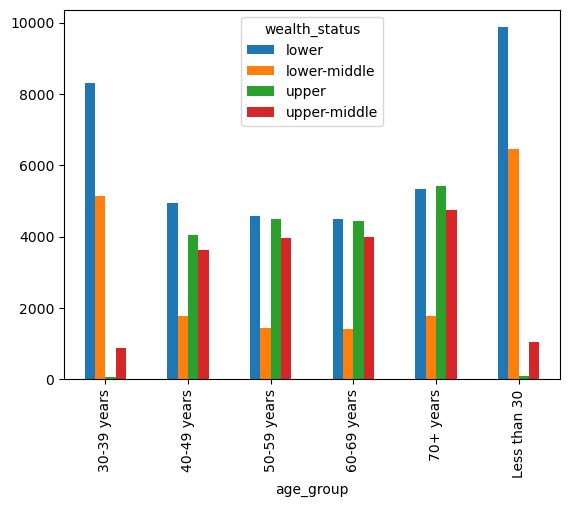

In [27]:
#print chart and save for export
bar_meatless_agegroup_wealthstatus = crosstab_6v1.plot.bar()

### V1 insight: 
#### -- age spread is roughly equal among meatless customers
#### -- the majority of meatless consumers under 40 have lower than average income
#### -- above 40 approx equal number of customers above and below average income

In [28]:
#export 
bar_meatless_agegroup_wealthstatus.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meatless_agegroup_wealthstatus.png' ))

### 6A visual 2.  lifestyle of meatless consumers by age

In [29]:
#create crosstab to evaluate customers' lifestyle by age group
crosstab_6v2 = pd.crosstab(clean_no_meat['age_group'], clean_no_meat['lifestyle'], dropna = False)

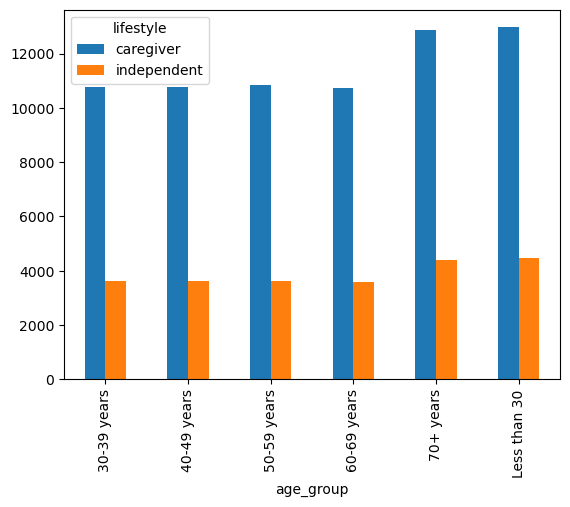

In [30]:
#print chart and save for export
bar_meatless_agegroup_lifestyle = crosstab_6v2.plot.bar()

### V2 insight: 
#### -- independant household numbers remain consistent throughout all age-groups 
#### -- its curious why theres no drop in caregiver numbers with increase in age

In [31]:
#export 
bar_meatless_agegroup_lifestyle.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meatless_agegroup_lifestyle.png' ))

### 6A visual 3.  family status of meatless consumers by age

In [32]:
#create crosstab to evaluate customers' family status by age group
crosstab_6v3 = pd.crosstab(clean_no_meat['age_group'], clean_no_meat['fam_status'], dropna = False)

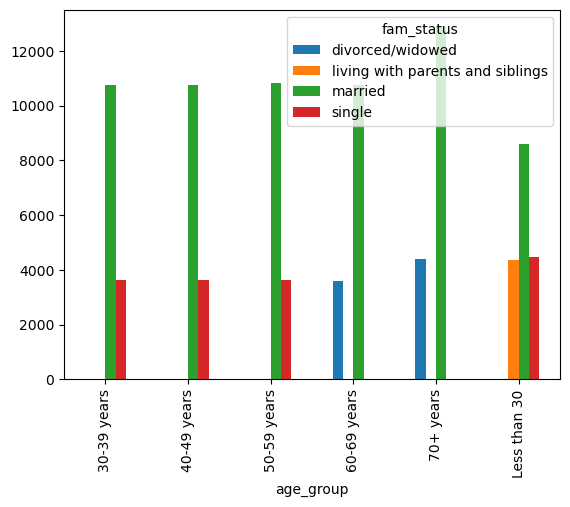

In [33]:
#print chart and save for export
bar_meatless_agegroup_famstatus = crosstab_6v3.plot.bar()

### V3 insight: 
#### -- customers are most likely married (approx 60%), consistent for all age groups above 30
#### -- approx. 30% of households are single for all age groups under 60

In [34]:
#export
bar_meatless_agegroup_famstatus.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meatless_agegroup_famstatus.png' ))

### 6A visual 4. lifestyle and family status of meatless consumers

In [90]:
#create crosstab to evaluate customers' family status by age group
crosstab_6v4 = pd.crosstab(clean_no_meat['lifestyle'], clean_no_meat['fam_status'], dropna = False)

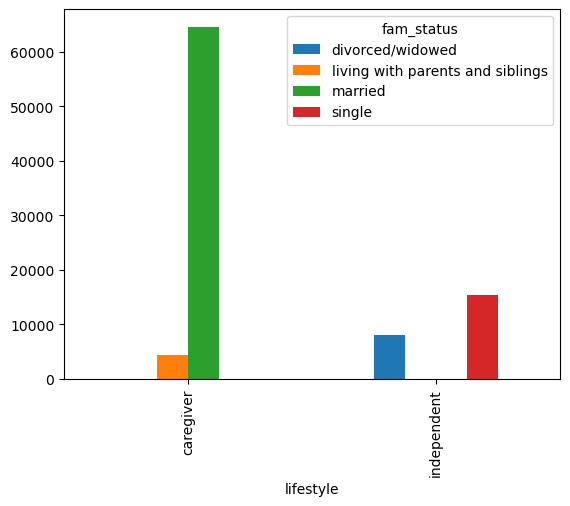

In [91]:
#print chart and save for export
bar_meatless_lifestyle_famstatus = crosstab_6v4.plot.bar()

### V4 insight: 
#### -- zero single or divorced households with dependents (interpreted as zero single parents)
#### -- all married customers have dependents, approx 60% of customers are married with dependents

In [92]:
#export
bar_meatless_lifestyle_famstatus.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meatless_lifestyle_famstatus.png' ))

### 6A visual 5. wealth status and family status of meatless consumers

In [93]:
#create crosstab to evaluate customers' family status by wealth
crosstab_6v5 = pd.crosstab(clean_no_meat['wealth_status'], clean_no_meat['fam_status'], dropna = False)

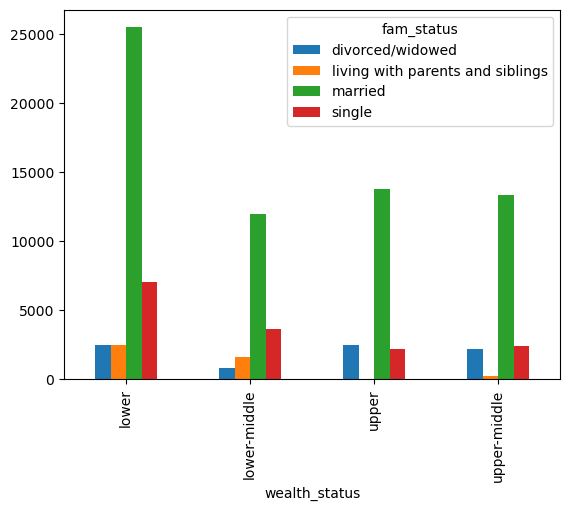

In [94]:
#print chart and save for export
bar_meatless_wealth_famstatus = crosstab_6v5.plot.bar()

### V5 insight: 
#### -- single customers are more likely to have less than average income 
#### --  married customers are evenly distributed 

In [95]:
#export
bar_meatless_wealth_famstatus.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meatless_wealth_famstatus.png' ))

### 6A visual 5b. wealth status and loyalty status of meatless consumers

In [86]:
#create crosstab to evaluate customers'wealth status by age group
crosstab_6v5b = pd.crosstab(clean_no_meat['wealth_status'], clean_no_meat['loyalty_flag'], dropna = False)

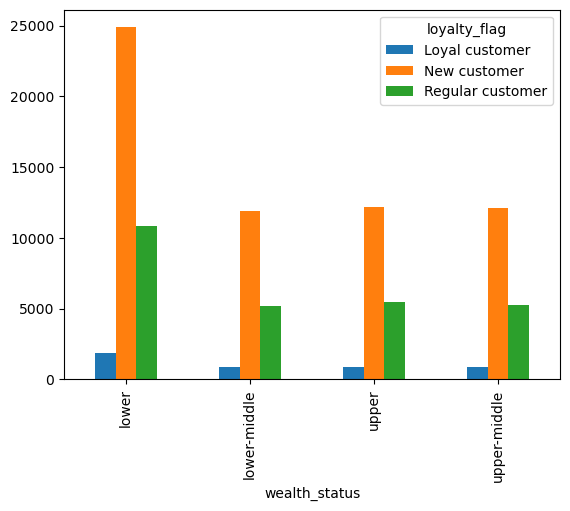

In [87]:
#print chart and save for export
bar_meatless_wealth_loyalty = crosstab_6v5b.plot.bar()

### V5b insight: 
#### -- loyal customers are evenly spread among income levels
#### -- lower income has majority for each category

In [88]:
#export
bar_meatless_wealth_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meatless_wealth_loyalty.png' ))

### 6A visual 5c. gender and loyalty status of meatless consumers

In [98]:
#create crosstab to evaluate customers'wealth status by age group
crosstab_6v5c = pd.crosstab(clean_no_meat['gender'], clean_no_meat['loyalty_flag'], dropna = False)

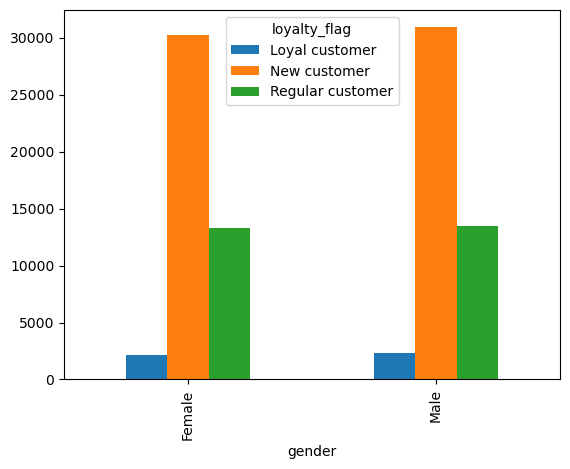

In [99]:
#print chart and save for export
bar_meatless_gender_loyalty = crosstab_6v5c.plot.bar()

### V5c insight: 
#### --- majority of meatless customers are new
#### -- loyal customers are evenly spread among genders
#### -- genders are evenly spread among meatless consumers

In [100]:
#export
bar_meatless_gender_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meatless_gender_loyalty.png' ))


## insight for meatless consumer profile: 92318 customers (45% of total) 
#### -- around 60% of meatless customers are married with dependents earning less than average income and are new customers
#### -- about 30% of the 60+ age group is divorced and have upper income status, also childless
#### -- 40 + age group is generally higher income than under 40
#### -- all single customers are childless and tend to have less than average income

# 6B import dataframe for meat consumers

In [41]:
%%time 
df_meat = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_meat_consumer_subset.pkl'))


CPU times: total: 18.1 s
Wall time: 37.9 s


In [42]:
#check
df_meat

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,n_dependents,fam_status,income,region,order_activity_flag,age_group,wealth_status,lifestyle,meat_purchase
131,2293453,19,prior,2,5,14,6.0,196,3,0,...,2017-02-03,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
132,1973799,19,prior,5,6,12,8.0,196,15,1,...,2017-02-03,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
133,532817,19,prior,7,4,17,6.0,196,1,1,...,2017-02-03,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
134,2474845,19,prior,6,5,13,20.0,17224,5,0,...,2017-02-03,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
135,86918,19,prior,9,5,16,8.0,9387,16,0,...,2017-02-03,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404260,293966,94920,prior,3,1,8,6.0,15629,2,1,...,2020-02-22,1,married,50312,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404855,484769,66343,prior,1,6,11,NaN,47210,1,0,...,2017-09-12,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404856,1561557,66343,prior,2,1,11,30.0,47210,1,1,...,2017-09-12,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404857,276317,66343,prior,3,6,15,19.0,47210,1,1,...,2017-09-12,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer


### remove duplicates of user_id and select only columns needed for visuals

In [102]:
# gather rows based on user_id
clean_meat = df_meat[selected_columns].drop_duplicates(subset='user_id')

In [103]:
#check
clean_meat

,user_id,age_group,wealth_status,lifestyle,fam_status,gender,loyalty_flag
131,19,60-69 years,upper,caregiver,married,Female,New customer
540,31,30-39 years,lower,caregiver,married,Female,Regular customer
839,43,40-49 years,upper-middle,caregiver,married,Female,Regular customer
1391,98,30-39 years,lower,caregiver,married,Female,Regular customer
1742,222,70+ years,lower,caregiver,married,Female,Loyal customer
...,...,...,...,...,...,...,...
32403973,97712,30-39 years,lower-middle,caregiver,married,Male,New customer
32404075,66785,70+ years,lower-middle,caregiver,married,Male,New customer
32404085,96151,60-69 years,upper-middle,caregiver,married,Male,New customer
32404256,94920,Less than 30,lower,caregiver,married,Male,New customer


### 6B visual 6.  wealth status of meat consumers by age

In [45]:
#create crosstab to evaluate customers' wealth status by age group
crosstab_6v6 = pd.crosstab(clean_meat['age_group'], clean_meat['wealth_status'], dropna = False)

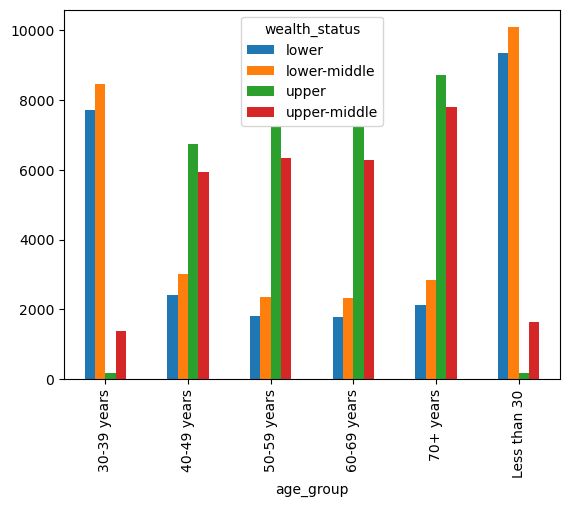

In [46]:
#print chart and save for export
bar_meat_agegroup_wealthstatus = crosstab_6v6.plot.bar()

### V6 insight: 
#### -- above average income customers are mostly 40+
#### -- under 40 trends in the lower income categories
#### -- roughly equal spread of customer count and age groups

In [47]:
#export
bar_meat_agegroup_wealthstatus.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meat_agegroup_wealthstatus.png' ))

### 6B visual 7.  lifestyle of meat consumers by age

In [48]:
#create crosstab to evaluate customers' lifestyle by age group
crosstab_6v7 = pd.crosstab(clean_meat['age_group'], clean_meat['lifestyle'], dropna = False)

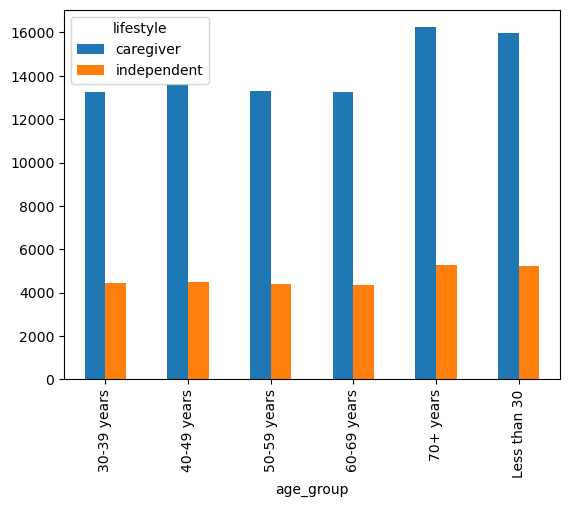

In [49]:
#print chart and save for export
bar_meat_agegroup_lifestyle = crosstab_6v7.plot.bar()

### V7 insight: 
#### - around 30% of customers are independent, the spread is similar to meatless customers

In [50]:
#export
bar_meat_agegroup_lifestyle.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meat_agegroup_lifestyle.png' ))

### 6B visual 8.  family status of meat consumers by age

In [51]:
#create crosstab to evaluate customers' family status by age group
crosstab_6v8 = pd.crosstab(clean_meat['age_group'], clean_meat['fam_status'], dropna = False)

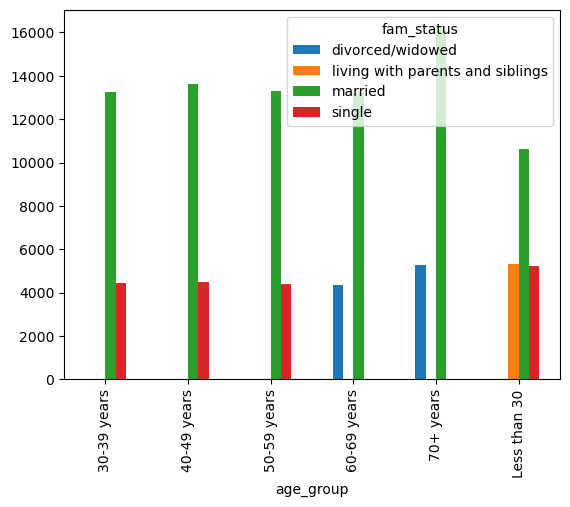

In [52]:
#print chart and save for export
bar_meat_agegroup_familystatus = crosstab_6v8.plot.bar()

### V8 insight: 
#### -- marriage status dominates followed by single customers, same with meatless group

In [53]:
#export
bar_meat_agegroup_familystatus.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meat_agegroup_famstatus.png' ))

### 6B visual 9. lifestyle and family status of meat consumers

In [54]:
#create crosstab to evaluate customers' family status by age group
crosstab_6v9 = pd.crosstab(clean_meat['lifestyle'], clean_meat['fam_status'], dropna = False)

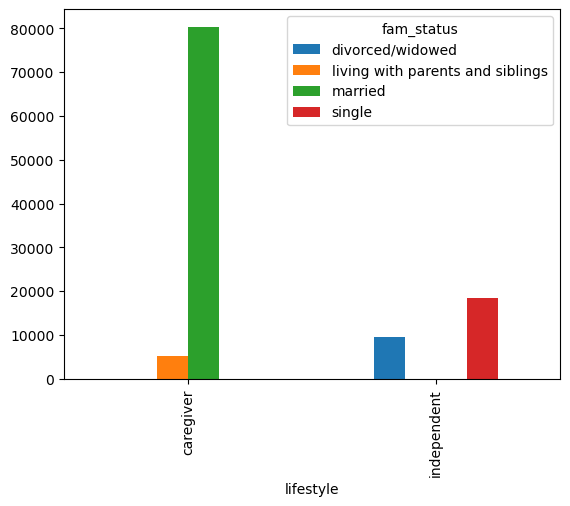

In [55]:
#print chart and save for export
bar_meat_lifestyle_famstatus = crosstab_6v9.plot.bar()

### V9 insight: 
#### -- no single or divorced customers have dependents
#### -- also no married customers are independent
#### same as meatless group

In [56]:
#export
bar_meat_lifestyle_famstatus.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meat_lifestyle_famstatus.png' ))

### 6B visual 10. wealth status and family status of meat consumers

In [57]:
#create crosstab to evaluate customers' family status by age group
crosstab_6v10 = pd.crosstab(clean_meat['wealth_status'], clean_meat['fam_status'], dropna = False)

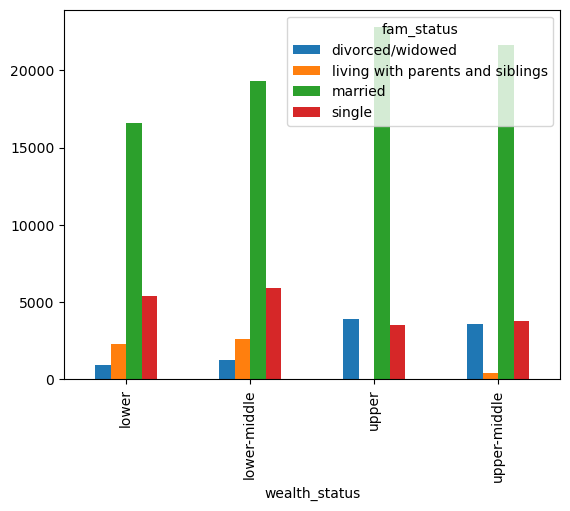

In [58]:
#print chart and save for export
bar_meat_wealth_famstatus = crosstab_6v10.plot.bar()

### V10 insight: 
#### -- marriage is highly probable, with a slight chance of having an above-average income (different from meatless consumers)
#### -- single customers are probably below average income
#### -- divorced customers are likely to have income above average

In [59]:
#export
bar_meat_wealth_famstatus.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meat_lifestyle_famstatus.png' ))

### 6B visual 11. wealth status and loyalty status of meat consumers

In [104]:
#create crosstab to evaluate customers'wealth status by age group
crosstab_6v11 = pd.crosstab(clean_meat['wealth_status'], clean_meat['loyalty_flag'], dropna = False)

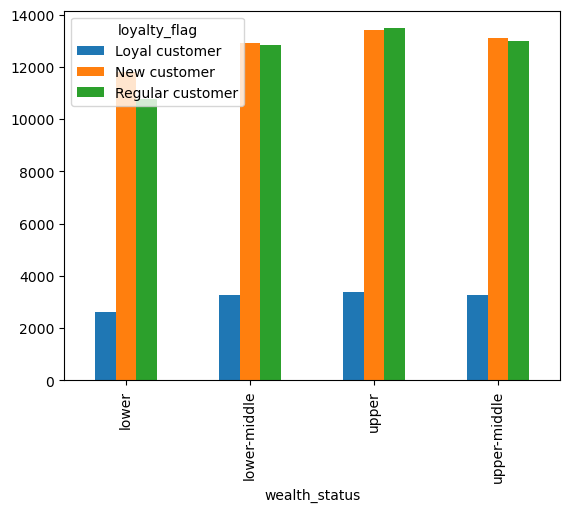

In [105]:
#print chart and save for export
bar_meat_wealth_loyalty = crosstab_6v11.plot.bar()

### V11 insight: 
#### -- loyal categories are evenly spread among income levels
#### -- meat consumers are equally likely to be new or regular

In [106]:
#export
bar_meat_wealth_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meat_wealth_loyalty.png' ))

### 6B visual 12. gender and loyalty status of meat consumers

In [107]:
#create crosstab to evaluate customers'wealth status by age group
crosstab_6v12 = pd.crosstab(clean_meat['gender'], clean_meat['loyalty_flag'], dropna = False)

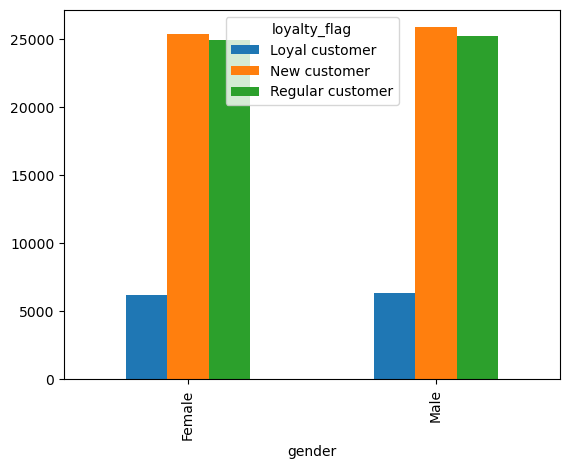

In [108]:
#print chart and save for export
bar_meat_gender_loyalty = crosstab_6v12.plot.bar()

### V12 insight: 
#### -- loyal customers are evenly spread among genders
#### -- genders are evenly spread among meatless consumers

In [109]:
#export
bar_meat_gender_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'bar_meat_gender_loyalty.png' ))

## insight for meat consuming households: 113891 customers (55% of total)
#### -- about 60% married with dependents with a chance of having above average income status
#### -- single is second largest group of meat customers, majority of which are lower than average income
#### --divorced customers have same attributes as meatless cohort
#### -- more regular customers in the meat cohort, loyalty seems to be spread evenly among the demographic

# Task 7. 
## Aggregate the max, mean, and min variables for usage frequency and expenditure
### A. Meatless customers
#### 1 orders 
#### 2 prices
### B. Meat purchasing customers
#### 1 orders 
#### 2 prices

## 7A import df_no_meat dataframe, aggregate the number of orders and purchases

In [60]:
%%time 
df_no_meat = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_not_meat_consumer_subset.pkl'))

CPU times: total: 4.89 s
Wall time: 11.9 s


In [61]:
#check columns 
df_no_meat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8642240 entries, 0 to 32404854
Data columns (total 37 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   eval_set                object        
 3   order_number            int64         
 4   orders_day_of_week      int64         
 5   order_hour_of_day       int64         
 6   days_since_prior_order  float64       
 7   product_id              int64         
 8   add_to_cart_order       int64         
 9   reordered               int64         
 10  product_name            object        
 11  aisle_id                int64         
 12  department_id           int64         
 13  prices                  float64       
 14  price_range_loc         object        
 15  busiest_day             object        
 16  busiest_days            object        
 17  busiest_period_of_day   object        
 18  m

## 7A.1 order_number aggregated
### age_group

In [62]:
df_no_meat.groupby('age_group').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                      max min       mean
age_group                               
30-39 years            99   1  14.379999
40-49 years            99   1  14.645219
50-59 years            99   1  14.589719
60-69 years            99   1  14.541701
70+ years              99   1  14.268462
Less than 30           99   1  14.646259

### lifestyle

In [63]:
df_no_meat.groupby('lifestyle').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                     max min       mean
lifestyle                              
caregiver             99   1  14.473130
independent           99   1  14.614899

### wealth-status

In [64]:
df_no_meat.groupby('wealth_status').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                       max min       mean
wealth_status                            
lower                   99   1  14.655541
lower-middle            99   1  14.419293
upper                   99   1  14.393162
upper-middle            99   1  14.459474

## 7A.2 prices aggregated
### age_group

In [65]:
df_no_meat.groupby('age_group').agg({'prices': ['max', 'min', 'mean']})

prices               
                max  min      mean
age_group                         
30-39 years    20.0  1.0  7.488619
40-49 years    20.0  1.0  7.482481
50-59 years    20.0  1.0  7.477215
60-69 years    20.0  1.0  7.485587
70+ years      20.0  1.0  7.469687
Less than 30   20.0  1.0  7.452290

### lifestyle

In [66]:
df_no_meat.groupby('lifestyle').agg({'prices': ['max', 'min', 'mean']})

prices               
               max  min      mean
lifestyle                        
caregiver     20.0  1.0  7.471286
independent   20.0  1.0  7.485729

### wealth_status

In [67]:
df_no_meat.groupby('wealth_status').agg({'prices': ['max', 'min', 'mean']})

prices               
                 max  min      mean
wealth_status                      
lower           20.0  1.0  6.827682
lower-middle    20.0  1.0  7.852048
upper           20.0  1.0  7.839294
upper-middle    20.0  1.0  7.858381

## 7B import df_meat dataframe, solve for total number of orders and total purchases

In [68]:
%%time 
df_meat = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_meat_consumer_subset.pkl'))

CPU times: total: 18.9 s
Wall time: 43.4 s


In [69]:
#check columns 
df_meat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23762619 entries, 131 to 32404858
Data columns (total 37 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   eval_set                object        
 3   order_number            int64         
 4   orders_day_of_week      int64         
 5   order_hour_of_day       int64         
 6   days_since_prior_order  float64       
 7   product_id              int64         
 8   add_to_cart_order       int64         
 9   reordered               int64         
 10  product_name            object        
 11  aisle_id                int64         
 12  department_id           int64         
 13  prices                  float64       
 14  price_range_loc         object        
 15  busiest_day             object        
 16  busiest_days            object        
 17  busiest_period_of_day   object        
 18

## 7B.1 orders aggregated
### age_group

In [70]:
df_meat.groupby('age_group').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                      max min       mean
age_group                               
30-39 years            99   1  18.285169
40-49 years            99   1  18.045736
50-59 years            99   1  18.066382
60-69 years            99   1  18.061164
70+ years              99   1  18.128828
Less than 30           99   1  18.022737

### lifestyle

In [71]:
df_meat.groupby('lifestyle').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                     max min       mean
lifestyle                              
caregiver             99   1  18.055736
independent           99   1  18.233624

### wealth_status

In [72]:
df_meat.groupby('wealth_status').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                       max min       mean
wealth_status                            
lower                   99   1  17.941433
lower-middle            99   1  18.286664
upper                   99   1  18.148001
upper-middle            99   1  17.987343

## 7B.2 prices aggregated
### age_group

In [73]:
df_meat.groupby('age_group').agg({'prices': ['max', 'min', 'mean']})

prices               
                max  min      mean
age_group                         
30-39 years    25.0  1.0  7.897958
40-49 years    25.0  1.0  7.912117
50-59 years    25.0  1.0  7.898118
60-69 years    25.0  1.0  7.910955
70+ years      25.0  1.0  7.909447
Less than 30   25.0  1.0  7.906296

### lifestyle

In [74]:
df_meat.groupby('lifestyle').agg({'prices': ['max', 'min', 'mean']})

prices               
               max  min      mean
lifestyle                        
caregiver     25.0  1.0  7.907519
independent   25.0  1.0  7.901237

### wealth_status

In [75]:
df_meat.groupby('wealth_status').agg({'prices': ['max', 'min', 'mean']})

prices               
                 max  min      mean
wealth_status                      
lower           25.0  1.0  7.571895
lower-middle    25.0  1.0  7.988374
upper           25.0  1.0  7.991308
upper-middle    25.0  1.0  7.996024

## insight from task 7 aggregations of meatless/ meat customer profiles:
#### -- meat consumers order more and choose higher priced goods on average

# Task 8 
## compare profiles with regions and departments, identify if link exists between them 
### A.  meatless customers
### B. meat consuming customers

### 8A meatless customers by region and department

In [76]:
#create crosstab to evaluate meatless customer region and departments 
crosstab_8a = pd.crosstab(df_no_meat['department_id'], df_no_meat['region'], dropna = False)

In [77]:
#check
crosstab_8a

region,Midwest,Northeast,South,West
department_id,,,,
1,134707,98073,192369,145425
2,2812,2179,3903,2969
3,66865,50286,91563,71586
4,550840,403804,779308,590849
5,17330,11608,23068,18147
6,15146,11090,20886,16565
7,232021,177410,327250,246787
8,5597,5119,8129,6987
9,41122,29917,57155,43555


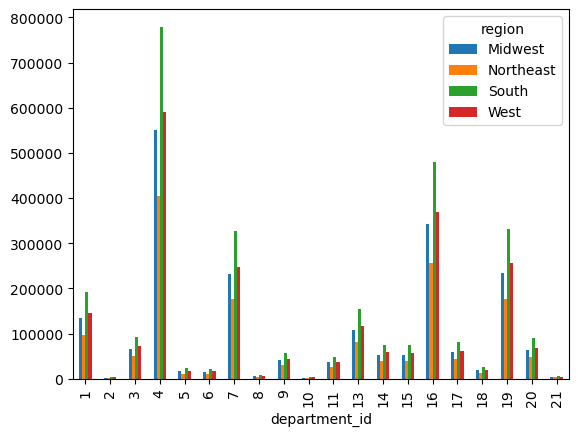

In [78]:
#print bar chart and save for export
bar_no_meat_region_dept = crosstab_8a.plot.bar()

### 8A insight: regions ranked by number of orders 
        * south
        * west
        * midwest
        * northeast

In [79]:
#export
bar_no_meat_region_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', '4.10.8_bar_no_meat_region_dept.png' ))

### 8B meat consuming customers by region and departments

In [80]:
#create crosstab to evaluate meatless customer region and departments 
crosstab_8b = pd.crosstab(df_meat['department_id'], df_meat['region'], dropna = False)

In [81]:
#check
crosstab_8b

region,Midwest,Northeast,South,West
department_id,,,,
1,389389,292845,555531,426404
2,5608,4406,8309,6105
3,207004,158313,297252,229559
4,1677097,1262035,2381243,1834115
5,18856,14934,28556,21197
6,48590,35801,68256,52919
7,393553,306008,571690,433404
8,16758,13482,23140,18504
9,162647,121899,230289,180043


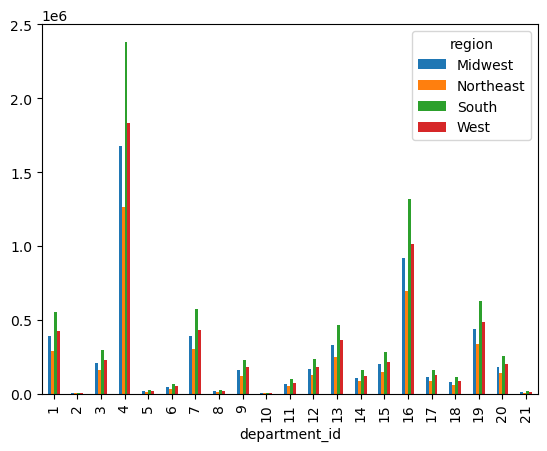

In [82]:
#print bar chart and save for export
bar_meat_region_dept = crosstab_8b.plot.bar()

### 8B insight:
#### -- the spread between regions is similar for both cohorts with the south, consistently, containing the largest number of customers 

In [110]:
#export
bar_meat_region_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', '4.10.8_bar_meat_region_dept.png' ))

# 9. Visualizations specific to project brief

#### 9.1 The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders. 

In [46]:
#create crosstab to evaluate total customers 
crosstab_9_1 = pd.crosstab(df['busiest_period_of_day'], df['busiest_days'], dropna = False)

In [11]:
#check
crosstab_9_1

busiest_days,Busiest days,Least busy days,Regularly busy
busiest_period_of_day,,,
Average orders,7642618,5083875,8451272
Fewest orders,198245,145471,252612
Most orders,4023549,2394990,4212227


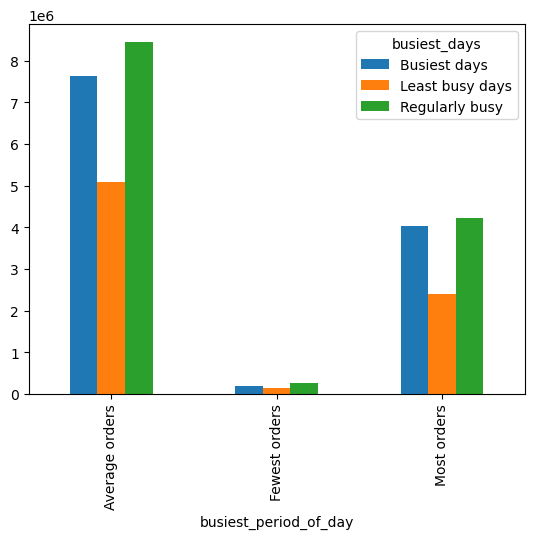

In [22]:
#print bar chart and save for export
bar_busiesthours_busiestdays = crosstab_9_1.plot.bar()


In [13]:
#export
bar_busiesthours_busiestdays.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', '4.10.9_bar_busiesthours_busiestdays.png' ))

#### They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

#### Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [80]:
#create crosstab to evaluate meatless customer region and departments 
crosstab_8b = pd.crosstab(df_meat['department_id'], df_meat['region'], dropna = False)

In [23]:
df['price_range_loc'].value_counts()

Mid-range     21860860
Low-range     10126321
High-range      417678
Name: price_range_loc, dtype: int64

#### Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [24]:
#create crosstab to evaluate total customers 
crosstab_9_2 = pd.crosstab(df['department_id'], df['loyalty_flag'], dropna = False)

In [25]:
#check
crosstab_9_2

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,609460,485283,1140000
2,10715,7719,17857
3,379873,223704,568851
4,3147376,1736622,4595293
5,38723,37698,77275
6,78394,57103,133756
7,855017,512871,1320235
8,25469,20536,51711
9,242580,189327,434720


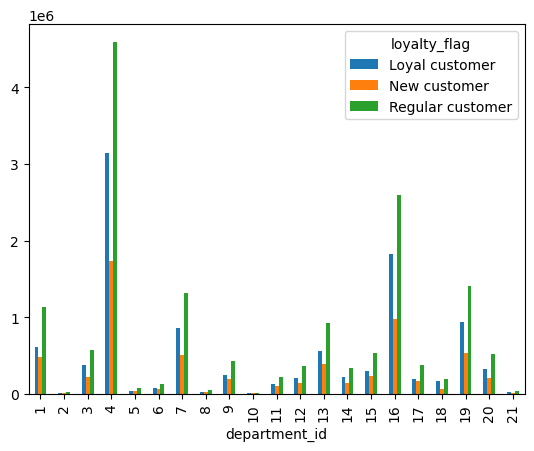

In [26]:
#print bar chart and save for export
bar_dept_loyalty = crosstab_9_2.plot.bar()


In [27]:
#export
bar_dept_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', '4.10.9_bar_dept_loyalty.png' ))

### Is there a connection between age and family status in terms of ordering habits?

In [29]:
#create crosstab to evaluate total customers 
crosstab_9_3 = pd.crosstab(df['department_id'], df['fam_status'], dropna = False)

In [30]:
#check
crosstab_9_3

fam_status,divorced/widowed,living with parents and siblings,married,single
department_id,,,,
1,193575,108533,1569050,363585
2,3002,1911,25205,6173
3,100401,56142,821881,194004
4,812834,449628,6654218,1562611
5,12615,8896,105682,26503
6,23060,13074,188466,44653
7,231025,124629,1889052,443417
8,8409,5620,67513,16174
9,74220,41702,609663,141042


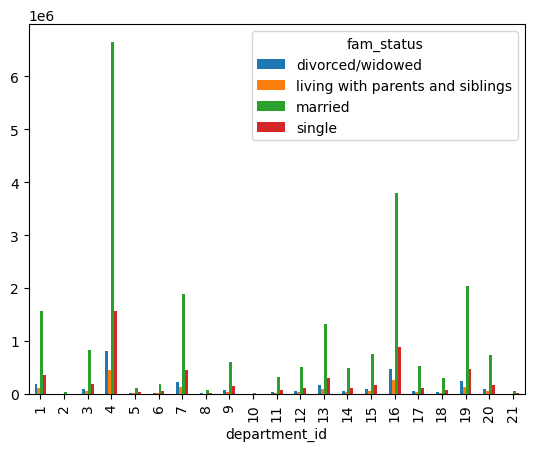

In [31]:
#print bar chart and save for export
bar_dept_family = crosstab_9_3.plot.bar()


In [32]:
#export
bar_dept_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', '4.10.9_bar_dept_family.png' ))